

# **Finding Corners**

1. To use Harris Corners to find corners
2. Use Good Features to Track


In [1]:
# Our Setup, Import Libaries, Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## **What is a Corner?**

A corner is a point whose local neighborhood stands in two dominant and different edge directions. In other words, a corner can be interpreted as the junction of two edges, where an edge is a sudden change in image brightness. Corners are the important features in the image, and they are generally termed as interest points which are invariant to translation, rotation, and illumination. (good key points)

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/edge.png)

### **Harris Corner Detection** is an algorithm developed in 1988 for corner detection that works fairly well.


**Paper** - http://www.bmva.org/bmvc/1988/avc-88-023.pdf

**cv2.cornerHarris**(input image, block size, ksize, k)
- Input image - should be grayscale and float32 type.
- blockSize - the size of neighborhood considered for corner detection
- ksize - aperture parameter of Sobel derivative used.
- k - harris detector free parameter in the equation
- **Output** – array of corner locations (x,y)




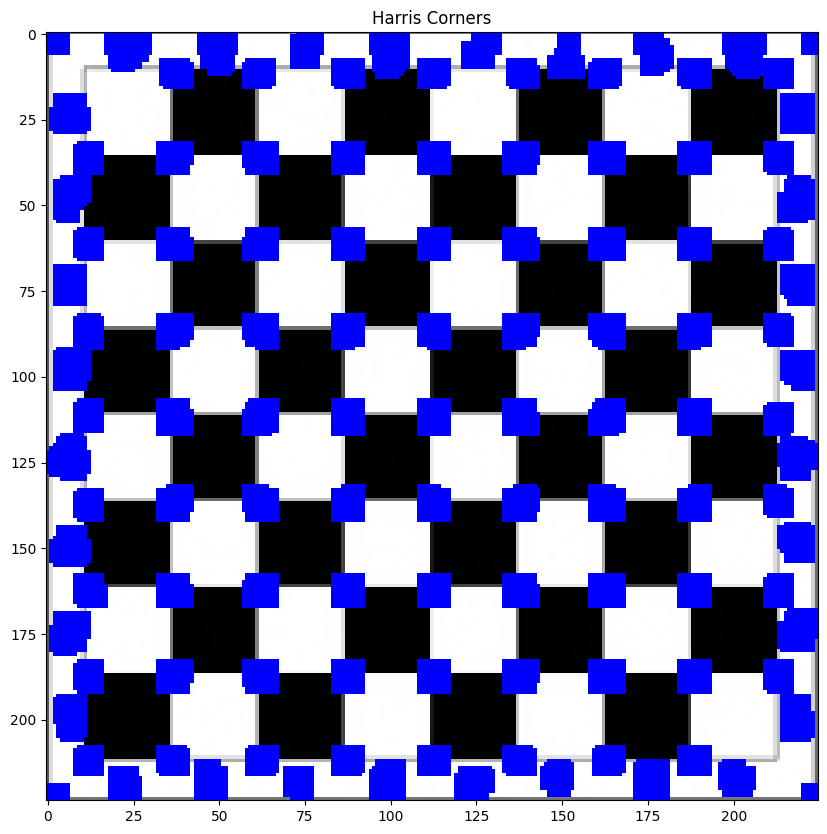

In [4]:
# Load image then grayscale
image = cv2.imread('chess.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# The cornerHarris function requires the array datatype to be float32
gray = np.float32(gray)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

#We use dilation of the corner points to enlarge them
kernel = np.ones((4,4),np.uint8)   # 4x4 kernel for dilation.
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)

# Threshold for an optimal value, it may vary depending on the image.
image[harris_corners > 0.025 * harris_corners.max() ] = [255,0,0]

imshow('Harris Corners', image)

# The condition harris_corners > threshold creates a Boolean mask, where:
# True (1) means it's a strong corner.
# False (0) means it's not a corner.

cv2.cornerHarris(src, blockSize, ksize, k):
- src: The grayscale image in float32.
- blockSize=3: Neighborhood size for corner detection.
- ksize=3: Aperture size for the Sobel operator (used to compute gradients).
- k=0.05: Harris detector's sensitivity parameter (typically between 0.04 and 0.06).
- This function returns an array where higher values indicate corners.

**cv2.goodFeaturesToTrack**(input image, maxCorners, qualityLevel, minDistance)

- Input Image - 8-bit or floating-point 32-bit, single-channel image.
- maxCorners – Maximum number of corners to return. If there are more corners than are found, the strongest of them is returned.
- qualityLevel – Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure (smallest eigenvalue). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the  qualityLevel=0.01 , then all the corners with the quality - - measure less than 15 are rejected.
- minDistance – Minimum possible Euclidean distance between the returned corners.


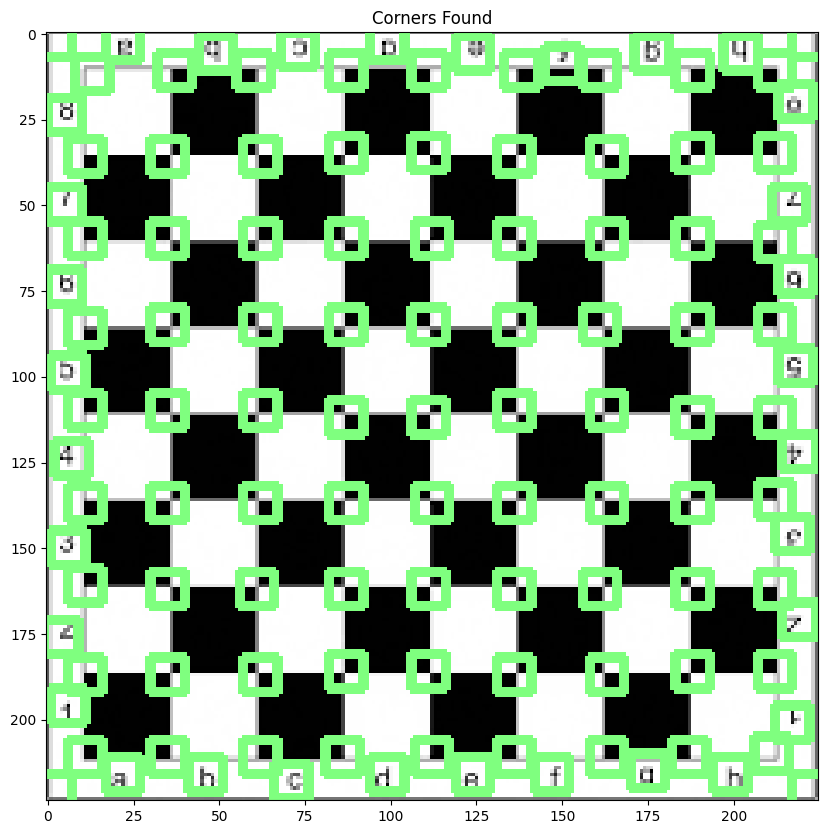

In [8]:
img = cv2.imread('chess.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# We specific the top 50 corners
corners = cv2.goodFeaturesToTrack(gray, 150, 0.0005, 10)
# maxCorners=150: Finds up to 150 strongest corners.
# qualityLevel=0.0005: The minimum accepted quality for a corner. Lower values detect weaker corners.
# minDistance=10: Ensures that selected corners are at least 10 pixels apart, preventing clutter.
sz = 5

for corner in corners:
    x, y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(img,(x-sz,y-sz),(x+sz,y+sz),(127,255,127), 2)

imshow("Corners Found", img)

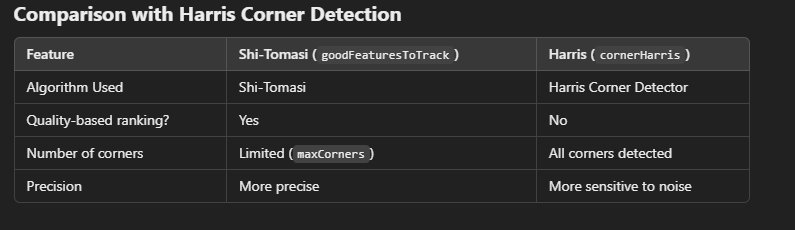